# Probability Distributions and the Central Limit Theorem

In [1]:
%matplotlib inline
from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Probability Distributions

Quick recall what a probability distribution is: Let $Z$ be some random variable. Then associated with $Z$ is a probability distribution function that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. You can see examples in the first figure of this chapter.

We can divide random variables into three classifications:
$Z$ is discrete: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...
$Z$ is continuous: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.
$Z$ is mixed: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories.

### Discrete Case

If $Z$ is discrete, then its distribution is called a probability mass function, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. There are popular probability mass functions that consistently appear: we will introduce them as needed, but let's introduce the first very useful probability mass function. 

### Poisson Distribution

We say $Z$ is Poisson-distributed if:
$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$
$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the intensity of the Poisson distribution.

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members.

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing
$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:
$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

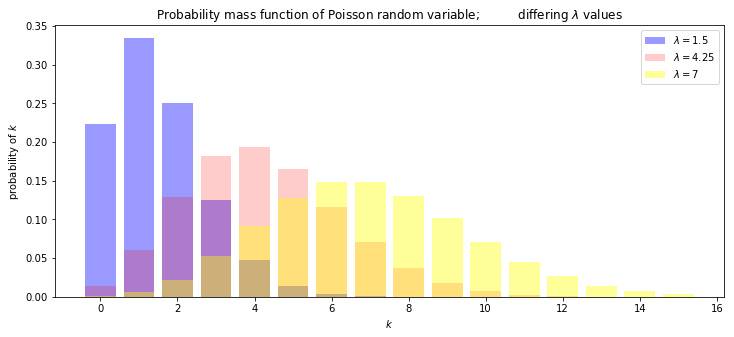

In [4]:
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25, 7]
colors = ['blue', 'red', 'yellow']

fig, axes = plt.subplots(figsize= [12,5])

axes.bar(a, poi.pmf(a, lambda_[0]), color = colors[0], alpha =.4, 
         label = '$\lambda = {}$'.format(lambda_[0]))
axes.bar(a, poi.pmf(a, lambda_[1]), color = colors[1], alpha =.2, 
         label = '$\lambda = {}$'.format(lambda_[1]))
axes.bar(a, poi.pmf(a, lambda_[2]), color = colors[2], alpha =.4, 
         label = '$\lambda = {}$'.format(lambda_[2]))
axes.set(ylabel = "probability of $k$", xlabel = "$k$", 
        title = "Probability mass function of Poisson random variable; \
         differing $\lambda$ values")
plt.legend(loc= 'upper right')

### Binomial Distribution

The binomial distribution is one of the most popular distributions, mostly because of its simplicity and usefulness. It has 2 parameters: $N$, a positive integer representing $N$ trials or number of instances of potential events, and $p$, the probability of an event occurring in a single trial. Like the Poisson distribution, it is a discrete distribution, but unlike the Poisson distribution, it only weighs integers from $0$ to $N$. The mass distribution looks like:
$$P( X = k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$
If $X$ is a binomial random variable with parameters $p$ and $N$, denoted $X \sim \text{Bin}(N,p)$, then $X$ is the number of events that occurred in the $N$ trials (obviously $0 \le X \le N$). The larger $p$ is (while still remaining between 0 and 1), the more events are likely to occur. The expected value of a binomial is equal to $Np$. Below we plot the mass probability distribution for varying parameters.

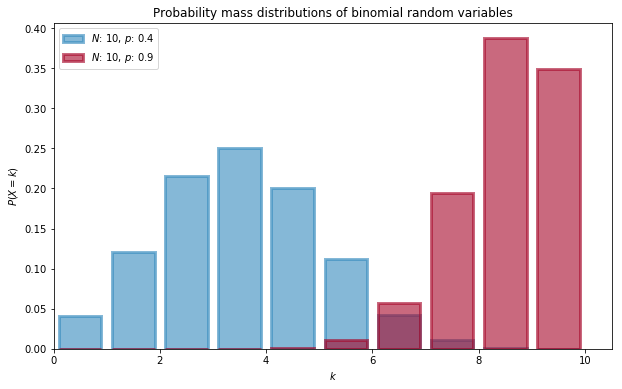

In [2]:
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

fig, ax = plt.subplots(figsize =[10,6])

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    ax.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)
ax.set(xlim =[0,10.5], xlabel = "$k$", ylabel = "$P(X = k)$", 
       title = "Probability mass distributions of binomial random variables");
ax.legend(loc="upper left")

### Gamma distribution

A Gamma random variable, denoted $X \sim \text{Gamma}(\alpha, \beta)$, is a random variable over the positive real numbers. It is in fact a generalization of the Exponential random variable, that is:
$$ \text{Exp}(\beta) \sim \text{Gamma}(1, \beta) $$

This additional parameter allows the probability density function to have more flexibility, hence allowing the practitioner to express his or her subjective priors more accurately. The density function for a $\text{Gamma}(\alpha, \beta)$ random variable is:
$$ f(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

where $\Gamma(\alpha)$ is the Gamma function, and for differing values of $(\alpha, \beta)$ looks like:

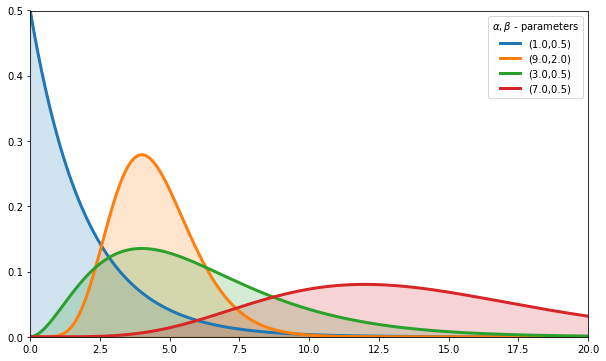

In [7]:
fig, ax = plt.subplots(figsize =[10,6])

gamma = stats.gamma
parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001, 20, 150)

parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001 ,20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = ax.plot(x, y, label = "(%.1f,%.1f)"%(alpha,beta), lw = 3)
    ax.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
    
ax.legend(title=r"$\alpha, \beta$ - parameters");

## Continuous Distributions

$\mathbf{GAUSSIAN (NORMAL)}$:
$P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty]$

* mean=$\mu$, variance=$\sigma^2$
* This distribution appears as the large N limit of the binomial distribution and the Central Limit Theorem.

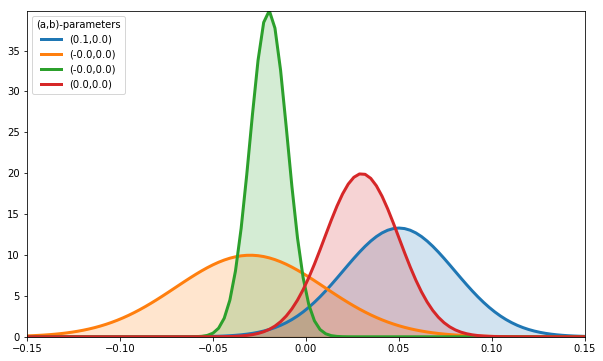

In [15]:
fig, ax = plt.subplots(figsize =[10,6])
params = [(0.05, 0.03), (-0.03, 0.04), (-0.02, 0.01), (0.03, 0.02)]

x = np.linspace(-0.15, 0.15, 100)
norm = stats.norm
for a, b in params:
    y = norm.pdf(x, a, b)
    lines = ax.plot(x, y, label = "(%.1f,%.1f)"%(a,b), lw = 3)
    ax.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
ax.legend(loc = 'upper left', title="(a,b)-parameters");

** Beta distribution**

Beta distribution is very useful in Bayesian statistics. A random variable $X$ has a $\text{Beta}$ distribution, with parameters $(\alpha, \beta)$, if its density function is:
$$f_X(x | \; \alpha, \beta ) = \frac{ x^{(\alpha - 1)}(1-x)^{ (\beta - 1) } }{B(\alpha, \beta) }$$
where $B$ is the Beta function (hence the name). The random variable $X$ is only allowed in [0,1], making the Beta distribution a popular distribution for decimal values, probabilities and proportions. The values of $\alpha$ and $\beta$, both positive values, provide great flexibility in the shape of the distribution. Below we plot some distributions:

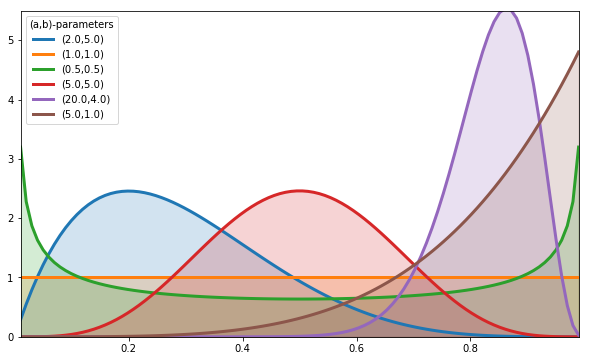

In [10]:
fig, ax = plt.subplots(figsize =[10,6])
params = [(2, 5), (1, 1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = ax.plot(x, y, label = "(%.1f,%.1f)"%(a,b), lw = 3)
    ax.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
ax.set(ylim = [0, 5.5])
ax.legend(loc = 'upper left', title="(a,b)-parameters");

** Exponential distribution**


***********************

### Wishart Distribution

Often distributions are about random variables that are scalars. 

We can also have random matrices! Specifically, the Wishart distribution is a distribution over all positive semi-definite matrices. Why is this useful to have in our arsenal? (Proper) covariance matrices are positive-definite, hence the Wishart is an appropriate prior for covariance matrices. It's tricky to visualize a distribution of matrices, so let's plot some realizations from the $5 \times 5$ (above) and $20 \times 20$ (below) Wishart distribution:

(One thing to notice is the symmetry of these matrices)

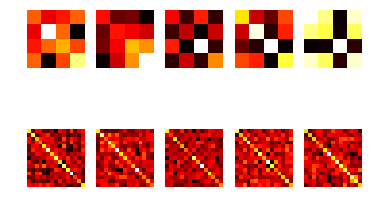

In [25]:
n =4
for i in range(10):
    ax = plt.subplot(2,5, i +1)
    if i >= 5:
        n =15
    plt.imshow(stats.wishart.rvs(n+1, np.eye(n)), interpolation ='none', 
                   cmap ='hot')
    ax.axis("off")

## Central Limit Theorem

> Take the mean of $n$ random samples from ANY arbitrary distribution with a well defined standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

Colloquially speaking, the theorem states that the average (or sum) of a set of random measurements will tend to a bell-shaped curve no matter the shape of the original meaurement distribution. This explains the ubiquity of the Gaussian distribution in science and statistics. We can demonstrate the Central Limit Thereom in Python by sampling from three different distributions: flat, exponential, and beta.

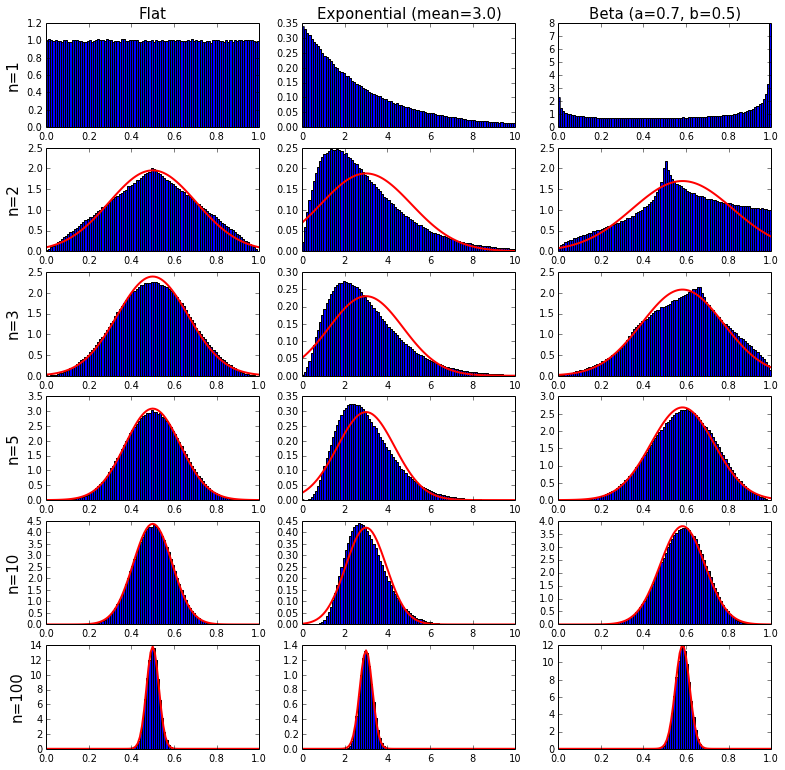

In [7]:
from functools import partial # provides capability to define function with partial arguments

N=1000000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in xrange(ln): # loop over number of n samples to average over
    for j in xrange(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'r',linewidth=2)     
plt.show()

In the graphs above the red curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also, 

- the mean of the Gaussian distribution is the same as the original parent distribution,
- the width of the Gaussian distribution scales as $1/\sqrt{n}$.